<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-05-16 16:10:56--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2019-05-16 16:10:56 (12.2 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2018.8.24          |           py35_1         139 KB  anaconda
    openssl-1.0.2r             |       h7b6447c_0         3.2 MB  anaconda
    ca-certificates-2019.1.23  |                0         126 KB  anaconda
    seaborn-0.9.0              |           py35_0         378 KB  anaconda
    ------------------------------------------------------------
                                           Total:         3.8 MB

The following packages will be UPDATED:

    ca-certificates: 2019.1.23-0          --> 2019.1.23-0       anaconda
    certifi:         2018.8.24-py35_1     --> 2018.8.24-py35_1  anaconda
    openssl:         1.0.2r-h7b6447c_0    --> 1.0.2r-h7b6447c_0 anaconda
    seaborn:         0

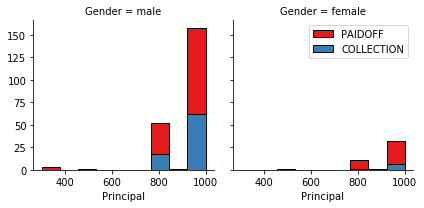

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

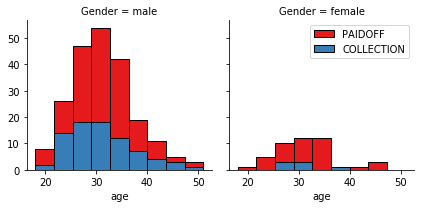

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

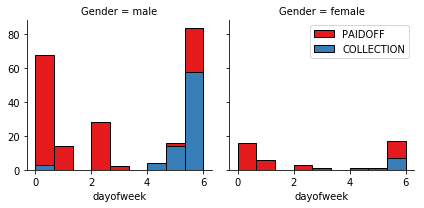

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [16]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [18]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [19]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
import sklearn.metrics as metrics
seed=40
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=seed)
score=[]
for k in range(1,200):
     knn=KNeighborsClassifier(n_neighbors=k,weights='uniform')
     knn.fit(x_train,y_train)
     y_pred=knn.predict(x_test)
     accuracy=metrics.accuracy_score(y_pred,y_test)
     score.append(accuracy*100)
     print(k,"::",accuracy)


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


1 :: 0.724137931034
2 :: 0.655172413793
3 :: 0.804597701149
4 :: 0.770114942529
5 :: 0.781609195402
6 :: 0.793103448276
7 :: 0.793103448276
8 :: 0.804597701149
9 :: 0.804597701149
10 :: 0.804597701149
11 :: 0.793103448276
12 :: 0.758620689655
13 :: 0.793103448276
14 :: 0.781609195402
15 :: 0.793103448276
16 :: 0.781609195402
17 :: 0.781609195402
18 :: 0.793103448276
19 :: 0.793103448276
20 :: 0.781609195402
21 :: 0.804597701149
22 :: 0.816091954023
23 :: 0.804597701149
24 :: 0.804597701149
25 :: 0.804597701149
26 :: 0.804597701149
27 :: 0.804597701149
28 :: 0.804597701149
29 :: 0.804597701149
30 :: 0.804597701149
31 :: 0.804597701149
32 :: 0.816091954023
33 :: 0.816091954023
34 :: 0.827586206897
35 :: 0.816091954023
36 :: 0.827586206897
37 :: 0.827586206897
38 :: 0.83908045977
39 :: 0.827586206897
40 :: 0.827586206897
41 :: 0.816091954023
42 :: 0.816091954023
43 :: 0.816091954023
44 :: 0.816091954023
45 :: 0.816091954023
46 :: 0.816091954023
47 :: 0.804597701149
48 :: 0.804597701149
49

In [21]:
max_index=score.index(max(score))+1
max_score=round(max(score),2)
print("The value of best k=",max_index,"And accyracy is:",max_score)

The value of best k= 38 And accyracy is: 83.91


Text(0,0.5,'Train Accuracy')

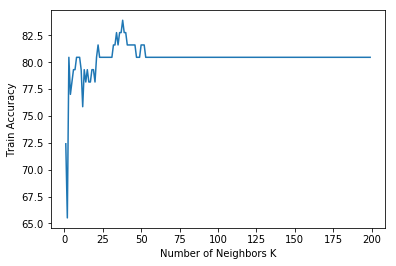

In [22]:
plt.plot(range(1,200),score)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')

In [23]:
# retraiing of model on k=38
knn=KNeighborsClassifier(n_neighbors=38,weights='uniform')
knn.fit(x_train,y_train)
predKNN=knn.predict(x_test)
accuracy=metrics.accuracy_score(predKNN,y_test)
print("accuracy : ",round(accuracy,3)*100,'%')

accuracy :  83.9 %


In [24]:
from sklearn.metrics import classification_report,jaccard_similarity_score,log_loss,f1_score
print(classification_report(y_test,predKNN))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_test,predKNN)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_test,predKNN,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y_train, knn.predict(x_train))*100,'%')

             precision    recall  f1-score   support

 COLLECTION       1.00      0.18      0.30        17
    PAIDOFF       0.83      1.00      0.91        70

avg / total       0.87      0.84      0.79        87



Jaccard Similarity Score :  83.91 %


F1-SCORE :  [ 0.3         0.90909091]


Train Accuracy:  73.3590733591 %


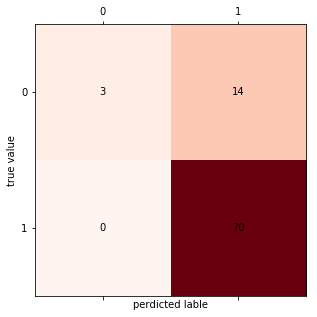

In [34]:
# confusion matrix
from sklearn.metrics import confusion_matrix
con=confusion_matrix(y_test,predKNN)

from matplotlib import pyplot as plt
fig,ax=plt.subplots(figsize=(5,5))
ax.matshow(con,cmap=plt.cm.Reds,alpha=1)
for i in range(con.shape[0]):
    for j in range(con.shape[1]):
        ax.text(x=j,y=i,s=con[i,j],va='center',ha='center')

plt.xlabel('perdicted lable')
plt.ylabel('true value')
plt.show()

# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV
import numpy as np
dc=DecisionTreeClassifier()
param_dict={'max_depth':np.arange(1,100),'max_features':np.arange(1,9),
            'criterion':['gini','entropy'],}

g_cv=GridSearchCV(dc,param_grid=param_dict,cv=15)
g_cv.fit(x_train,y_train)
print('Best_Score:{}'.format(g_cv.best_score_))
print('Best_parameters:{}'.format(g_cv.best_params_))

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Best_Score:0.7335907335907336
Best_parameters:{'criterion': 'gini', 'max_depth': 1, 'max_features': 1}


             precision    recall  f1-score   support

 COLLECTION       0.00      0.00      0.00        17
    PAIDOFF       0.80      1.00      0.89        70

avg / total       0.65      0.80      0.72        87



jaccard similarity score:  80.46 %


F1-Score:  [ 0.          0.89171975]


Train accuracy: 73.3590733591 %


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


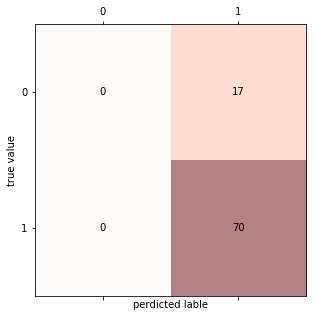

In [33]:
# training with best parameters
dctree=DecisionTreeClassifier(max_depth=1  ,criterion='gini',max_features=1)
dctree.fit(x_train,y_train)
y_pred=dctree.predict(x_test)
print(classification_report(y_test,y_pred))
print('\n')
print('jaccard similarity score: ',round(jaccard_similarity_score(y_test,y_pred)*100,2),'%')
print('\n')
print('F1-Score: ',f1_score(y_test,y_pred,average=None))
print('\n')
print('Train accuracy:',metrics.accuracy_score(y_train,dctree.predict(x_train))*100,'%')


# confusion matrix for decision tree
from sklearn.metrics import confusion_matrix
con=confusion_matrix(y_test,y_pred)

from matplotlib import pyplot as plt
fig,ax=plt.subplots(figsize=(5,5))
ax.matshow(con,cmap=plt.cm.Reds,alpha=0.5)
for i in range(con.shape[0]):
    for j in range(con.shape[1]):
        ax.text(x=j,y=i,s=con[i,j],va='center',ha='center')

plt.xlabel('perdicted lable')
plt.ylabel('true value')
plt.show()


# Support Vector Machine

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm=SVC()
param_grid={'C':np.arange(1,10,1)}
from sklearn.grid_search import GridSearchCV
gcv=GridSearchCV(svm,param_grid=param_grid,cv=10)
gcv.fit(x_train,y_train)
print(gcv.best_score_)
print(gcv.best_params_)


0.7104247104247104
{'C': 1}


In [37]:
pred_svm=gcv.predict(x_test)

print(classification_report(y_test,pred_svm))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_test,pred_svm)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_test,pred_svm,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y_train, gcv.predict(x_train))*100,'%')


             precision    recall  f1-score   support

 COLLECTION       0.00      0.00      0.00        17
    PAIDOFF       0.80      1.00      0.89        70

avg / total       0.65      0.80      0.72        87



Jaccard Similarity Score :  80.46 %


F1-SCORE :  [ 0.          0.89171975]


Train Accuracy:  74.9034749035 %


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(x_train,y_train)
p_pred=lr.predict(x_test)

print(classification_report(y_test,p_pred))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_test,p_pred)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_test,p_pred,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y_train, lr.predict(x_train))*100,'%')


             precision    recall  f1-score   support

 COLLECTION       0.00      0.00      0.00        17
    PAIDOFF       0.80      1.00      0.89        70

avg / total       0.65      0.80      0.72        87



Jaccard Similarity Score :  80.46 %


F1-SCORE :  [ 0.          0.89171975]


Train Accuracy:  73.3590733591 %


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Model Evaluation using Test set

In [39]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [40]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-05-16 16:43:28--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-05-16 16:43:28 (612 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [41]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [42]:
# converting into datetime format 
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


In [43]:
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6


In [45]:
test_df['weekend']=test_df['dayofweek'].apply(lambda x: 1 if (x>3) else 0)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


In [50]:
# to check for missing values in our data set
test_df.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dayofweek         0
weekend           0
dtype: int64

In [56]:
# converting Gender into numeric format
label={'female':1,'male':0}
test_df.replace(label,inplace=True)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [59]:
dumm=pd.get_dummies(test_df['education'])
dumm.head()

,Bechalor,High School or Below,Master or Above,college
0,1,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,0,1
4,1,0,0,0


In [60]:
#dumm=dumm.drop('Master or Above',axis=1,inplace=True)
dumm=dumm[['Bechalor','High School or Below','college']]
test_feature = test_df[['Principal','terms','age','Gender','weekend']]
test_feature = pd.concat([test_feature,dumm], axis=1)
#test_feature.drop(['Master or Above'], axis = 1,inplace=True)
test_feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [63]:
test_data= test_feature
test_data= preprocessing.StandardScaler().fit(test_data).transform(test_data)
y_t=test_df['loan_status']

# We will use train.csv data for training the model and for perfromance evaluation of model we will use testing data

# KNN

In [65]:
knn=KNeighborsClassifier()
knn.fit(X,y)
KNN_test=knn.predict(test_data)
accuracy=metrics.accuracy_score(KNN_test,y_t)
print("accuracy : ",round(accuracy,4)*100,'%')

accuracy :  74.07 %


In [70]:
# for finding best K value for model
score=[]
for k in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=k,weights='uniform')
    knn.fit(X,y)
    KNN=knn.predict(test_data)
    accuracy=metrics.accuracy_score(KNN,y_t)
    score.append(accuracy*100)
    print (k,': ',accuracy)

1 :  0.703703703704
2 :  0.574074074074
3 :  0.648148148148
4 :  0.62962962963
5 :  0.740740740741
6 :  0.685185185185
7 :  0.722222222222
8 :  0.703703703704
9 :  0.703703703704
10 :  0.685185185185
11 :  0.685185185185
12 :  0.666666666667
13 :  0.703703703704
14 :  0.703703703704
15 :  0.722222222222
16 :  0.703703703704
17 :  0.722222222222
18 :  0.703703703704
19 :  0.722222222222
20 :  0.740740740741
21 :  0.759259259259
22 :  0.759259259259
23 :  0.759259259259
24 :  0.722222222222
25 :  0.740740740741
26 :  0.777777777778
27 :  0.759259259259
28 :  0.777777777778
29 :  0.759259259259
30 :  0.777777777778
31 :  0.740740740741
32 :  0.796296296296
33 :  0.777777777778
34 :  0.796296296296
35 :  0.796296296296
36 :  0.777777777778
37 :  0.796296296296
38 :  0.796296296296
39 :  0.796296296296
40 :  0.796296296296
41 :  0.796296296296
42 :  0.796296296296
43 :  0.777777777778
44 :  0.796296296296
45 :  0.796296296296
46 :  0.796296296296
47 :  0.777777777778
48 :  0.777777777778
49

In [71]:
print('Best K value for model is:',score.index(max(score))+1,' : ',round(max(score),2),'%')


Best K value for model is: 32  :  79.63 %


In [74]:
# Retraing model on k=32 
knn=KNeighborsClassifier(n_neighbors=32)
knn.fit(X,y)
predKNN_test=knn.predict(test_data)
accuracy=metrics.accuracy_score(predKNN_test,y_t)
print("Accuracy_Of_Model: ",round(accuracy,4)*100,'%')

Accuracy_Of_Model:  79.63 %


In [77]:
print(classification_report(y_t,predKNN_test))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_t,predKNN_test)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_t,predKNN_test,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y,knn.predict(X))*100,'%')




             precision    recall  f1-score   support

 COLLECTION       0.71      0.36      0.48        14
    PAIDOFF       0.81      0.95      0.87        40

avg / total       0.78      0.80      0.77        54



Jaccard Similarity Score :  79.63 %


F1-SCORE :  [ 0.47619048  0.87356322]


Train Accuracy:  74.8554913295 %


# DecisionTreeCLassifier


In [79]:
 # to find best parameter we perform GridSearchCV opeartion
    
dtree=DecisionTreeClassifier()
parameter_grid = {'max_depth': [1, 2, 3, 4, 5,6,5,9,15,20],
                  'max_features': [1, 2, 3, 4,5,6,7,8],
                 'random_state':[0,15,20,35,50,80,100,150,180,200],
                 'criterion':['gini','entropy'],
                 }

grid_search = GridSearchCV(dtree, param_grid = parameter_grid,
                          cv =10)

grid_search.fit(X, y)

print ("Best Score: {}".format(grid_search.best_score_))
print ("Best params: {}".format(grid_search.best_params_))

Best Score: 0.7687861271676301
Best params: {'criterion': 'entropy', 'max_depth': 6, 'random_state': 20, 'max_features': 4}


In [80]:
# training on these above values
dtree=DecisionTreeClassifier(max_depth=6,criterion='entropy',max_features=4,random_state=20).fit(X,y)
pred_Dtree=dtree.predict(test_data)
print(classification_report(y_t,pred_Dtree))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_t,pred_Dtree)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_t,pred_Dtree,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y, dtree.predict(X))*100,'%')

             precision    recall  f1-score   support

 COLLECTION       0.44      0.29      0.35        14
    PAIDOFF       0.78      0.88      0.82        40

avg / total       0.69      0.72      0.70        54



Jaccard Similarity Score :  72.22 %


F1-SCORE :  [ 0.34782609  0.82352941]


Train Accuracy:  79.4797687861 %


# Support vector machine SVM

In [81]:
svm=SVC().fit(X,y)
pred_svm=svm.predict(test_data)
print(classification_report(y_t,pred_svm))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_t,pred_svm)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_t,pred_svm,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y, svm.predict(X))*100,'%')

             precision    recall  f1-score   support

 COLLECTION       0.00      0.00      0.00        14
    PAIDOFF       0.74      0.97      0.84        40

avg / total       0.55      0.72      0.62        54



Jaccard Similarity Score :  72.22 %


F1-SCORE :  [ 0.          0.83870968]


Train Accuracy:  76.0115606936 %


# LogisticRegression Classifier


In [82]:
# with adding penality  to avoid overfitting
lgm=LogisticRegression(penalty='l2').fit(X,y)
pred_lgm=lgm.predict(test_data)
print(classification_report(y_t,pred_lgm))
print('\n')
print('Jaccard Similarity Score : ',round(jaccard_similarity_score(y_t,pred_lgm)*100,2),'%')
print('\n')
print('F1-SCORE : ',f1_score(y_t,pred_lgm,average=None))
print('\n')
print('Train Accuracy: ',metrics.accuracy_score(y, lgm.predict(X))*100,'%')

             precision    recall  f1-score   support

 COLLECTION       1.00      0.07      0.13        14
    PAIDOFF       0.75      1.00      0.86        40

avg / total       0.82      0.76      0.67        54



Jaccard Similarity Score :  75.93 %


F1-SCORE :  [ 0.13333333  0.86021505]


Train Accuracy:  75.4335260116 %


# Final report of project on testing data


In [85]:
l=['KNN','DecisionTreeCLassifier','SVM','LogisticRegression']
j_knn=round(jaccard_similarity_score(y_t,predKNN_test)*100,2)
j_dtree=round(jaccard_similarity_score(y_t,pred_Dtree)*100,2)
j_svm=round(jaccard_similarity_score(y_t,pred_svm)*100,2)
j_lgm=round(jaccard_similarity_score(y_t,pred_lgm)*100,2)
Jaccard=[j_knn,j_dtree,j_svm,j_lgm]

f1_knn=f1_score(y_t,predKNN_test,average=None)
f1_dtree=f1_score(y_t,pred_Dtree,average=None)
f1_svm=f1_score(y_t,pred_svm,average=None)
f1_lgm=f1_score(y_t,pred_lgm,average=None)
F1_score=[f1_knn,f1_dtree,f1_svm,f1_lgm]

table = pd.DataFrame({
    "Algorithm": l,
    "Jaccatd": Jaccard,
    "F1-Score": F1_score,
    "LogLoss":[np.NAN,np.NAN,np.NAN,np.NAN]})

table

,Algorithm,F1-Score,Jaccatd,LogLoss
0,KNN,"[0.47619047619, 0.873563218391]",79.63,NaN
1,DecisionTreeCLassifier,"[0.347826086957, 0.823529411765]",72.22,NaN
2,SVM,"[0.0, 0.838709677419]",72.22,NaN
3,LogisticRegression,"[0.133333333333, 0.860215053763]",75.93,NaN


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>